# Linear regression:
### In this notebook, we will experiment with various regression approaches.

In [1]:
# load the necessary packages
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import train_test_split 
import pylab as pl
plt.style.use('ggplot')

In [2]:
df_communities = pd.read_csv('../../data/communities/communities.csv', sep = ',', na_values = ['?'])
df_communities.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [3]:
df_communities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1994 non-null   int64  
 1   communityname          1994 non-null   object 
 2   population             1994 non-null   float64
 3   householdsize          1994 non-null   float64
 4   racepctblack           1994 non-null   float64
 5   racePctWhite           1994 non-null   float64
 6   racePctAsian           1994 non-null   float64
 7   racePctHisp            1994 non-null   float64
 8   agePct12t21            1994 non-null   float64
 9   agePct12t29            1994 non-null   float64
 10  agePct16t24            1994 non-null   float64
 11  agePct65up             1994 non-null   float64
 12  numbUrban              1994 non-null   float64
 13  pctUrban               1994 non-null   float64
 14  medIncome              1994 non-null   float64
 15  pct

<p>The data set has a total of 100 columns of which 1 is categorical and the rest are numerical attributes. </p>

In [4]:
df_communities.shape

(1994, 100)

<p>So, we have 1994 data points with 100 columns.</p>

#### let's find out if the data set has any missing values by determining the number of missing values in each column

In [5]:
df_na_sum = df_communities.isna().sum()

# let's do a subselection an donly extract out where the values are greater than 0
print(df_na_sum[df_na_sum > 0]/len(df_communities))

OtherPerCap    0.000502
dtype: float64


<p>There is one attribute, OtherPerCap, with 0.05% missing values.</p>

### Handling missing values by imputing those values based on the variable means.

In [6]:
# Calculate the OtherPerCap mean and use it to fill in the missing values.
otherPerCap_mean = df_communities['OtherPerCap'].mean()
df_communities['OtherPerCap'].fillna(otherPerCap_mean, axis = 0, inplace = True)
df_communities.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [7]:
### Validate if the missing values within the OtherPerCap attributes have been replaced by the mean of the variable.
df_na_sum = df_communities.isna().sum()
print(df_na_sum[df_na_sum > 0]/len(df_communities))

Series([], dtype: float64)


<p>We learn that they are no any missing values.</p>

### Compute and display basic statistics for the variables in the data set.

In [8]:
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=7) # setting my printing preferences. 
df_communities.describe()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000
max,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<p>Here, we get the mean, standard deviation, min, max, 1 percentile, median and 3rd percentile for all the numerical attributes of our data set.</p>

### Separate the target attribute for regression from the rest of the attributes of the data set

In [9]:
vs_target = df_communities['ViolentCrimesPerPop']
vs_target.head() # display the first 5 records

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

In [10]:
df_communities.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


### Let's drop the Communityname and ViolentCrimesPerPop from the data set.

In [11]:
fieldsToDrop = ['ViolentCrimesPerPop','communityname']

In [12]:
### let's drop ViolentCrimesPerPop attribute from the data set. 
df_communities.drop(columns=fieldsToDrop, inplace = True)

In [13]:
print(vs_target.shape)
df_communities.shape

(1994,)


(1994, 98)

<p>The data set now has 1994 data points with 98 attributes. </p>

In [14]:
# first five records of the data set
df_communities.head() 

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,8,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,53,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,24,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,34,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,42,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


### let's convert the original data set and the response variable into numpy arrays since we would like to do machine learning with numpy arrays

In [15]:
# setting my printing preferences.
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=7)  

#### let's extract the feature names

In [16]:
# extract the column names and convert the series of index into a numpy array
feature_names = np.array(df_communities.columns)
feature_names.shape
print(feature_names[:10]) # display the first 10 records

['state' 'population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctAsian' 'racePctHisp' 'agePct12t21'
 'agePct12t29' 'agePct16t24']


In [17]:
# convert df_communities into a numpy array
communitiesNdArray = np.array(df_communities)
print(communitiesNdArray[0:3]) # first three records
communitiesNdArray.shape

[[ 8.    0.19  0.33  0.02  0.9   0.12  0.17  0.34  0.47  0.29  0.32  0.2   1.    0.37  0.72  0.34  0.6   0.29  0.15
   0.43  0.39  0.4   0.39  0.32  0.27  0.27  0.36  0.41  0.08  0.19  0.1   0.18  0.48  0.27  0.68  0.23  0.41  0.68
   0.4   0.75  0.75  0.35  0.55  0.59  0.61  0.56  0.74  0.76  0.04  0.14  0.03  0.24  0.27  0.37  0.39  0.07  0.07
   0.08  0.08  0.89  0.06  0.14  0.13  0.33  0.39  0.28  0.55  0.09  0.51  0.5   0.21  0.71  0.52  0.05  0.26  0.65
   0.14  0.06  0.22  0.19  0.18  0.36  0.35  0.38  0.34  0.38  0.46  0.25  0.04  0.    0.12  0.42  0.5   0.51  0.64
   0.12  0.26  0.2 ]
 [53.    0.    0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  0.02  1.    0.31  0.72  0.11  0.45  0.25  0.29
   0.39  0.29  0.37  0.38  0.33  0.16  0.3   0.22  0.35  0.01  0.24  0.14  0.24  0.3   0.27  0.73  0.57  0.15  1.
   0.63  0.91  1.    0.29  0.43  0.47  0.6   0.39  0.46  0.53  0.    0.24  0.01  0.52  0.62  0.64  0.63  0.25  0.27
   0.25  0.23  0.84  0.1   0.16  0.1   0.17  0.29  0.

(1994, 98)

In [18]:
# convert target (response) variable into a numpy array
targetNdArray = np.array(vs_target)
print(targetNdArray[0:5]) # the first five records
targetNdArray.shape

[0.2  0.67 0.43 0.12 0.03]


(1994,)

### Create a 20% - 80% randomized split of the data set by using the train_test_split module from the sklearn.model_selection package.
#### Set a side 20% test portion and 80% training data partition

In [19]:
# train_test_split shuffles the data and splits it into two split for us into 80% training and 20% percent testing.
vs_train_communities, vs_test_communities, vs_target_train, vs_target_test = train_test_split(communitiesNdArray, targetNdArray, test_size = 0.2, random_state = 33)
print(vs_test_communities.shape)
vs_test_communities[0:5] # first five records

(399, 98)


array([[ 4.  ,  0.  ,  0.46,  0.01,  0.97,  0.09,  0.04,  0.4 ,  0.26,  0.2 ,  0.49,  0.02,  1.  ,  1.  ,  0.55,
         1.  ,  0.88,  0.42,  0.09,  0.46,  1.  ,  1.  ,  1.  ,  1.  ,  0.81,  0.71,  0.24,  1.  ,  0.  ,  0.07,
         0.04,  0.04,  0.97,  0.16,  0.38,  0.2 ,  0.64,  0.24,  0.21,  0.2 ,  0.22,  0.37,  0.97,  0.95,  0.97,
         0.91,  0.25,  0.  ,  0.  ,  0.02,  0.  ,  0.45,  0.45,  0.51,  0.46,  0.19,  0.17,  0.17,  0.15,  0.89,
         0.06,  0.16,  0.19,  0.51,  0.48,  0.45,  0.99,  0.01,  0.  ,  1.  ,  0.02,  0.63,  0.99,  0.09,  0.47,
         0.67,  0.  ,  0.  ,  0.85,  1.  ,  1.  ,  0.78,  1.  ,  1.  ,  1.  ,  0.46,  0.44,  0.22,  0.  ,  0.  ,
         0.18,  0.13,  0.73,  0.76,  0.55,  0.04,  0.06,  0.03],
       [25.  ,  0.01,  0.35,  0.01,  0.96,  0.04,  0.04,  0.32,  0.45,  0.29,  0.62,  0.02,  0.94,  0.3 ,  0.45,
         0.1 ,  0.39,  0.62,  0.38,  0.38,  0.34,  0.32,  0.32,  0.21,  0.08,  0.05,  0.17,  0.22,  0.01,  0.24,
         0.44,  0.58,  0.2 ,  0

In [20]:
print(vs_train_communities.shape)
vs_train_communities[0:5] # the first five records

(1595, 98)


array([[34.  ,  0.01,  0.54,  0.02,  0.91,  0.27,  0.04,  0.37,  0.41,  0.25,  0.28,  0.02,  1.  ,  0.89,  0.74,
         0.15,  0.83,  0.35,  0.02,  0.4 ,  0.88,  0.76,  0.75,  0.88,  0.46,  0.44,  0.47,  0.63,  0.  ,  0.05,
         0.06,  0.09,  0.77,  0.19,  0.63,  0.36,  0.29,  0.22,  0.36,  0.24,  0.23,  0.53,  0.89,  0.92,  0.97,
         0.81,  0.17,  0.26,  0.  ,  0.04,  0.01,  0.27,  0.3 ,  0.33,  0.42,  0.18,  0.18,  0.18,  0.21,  0.82,
         0.08,  0.19,  0.21,  0.59,  0.6 ,  0.39,  0.86,  0.03,  0.22,  0.5 ,  0.01,  0.76,  0.83,  0.  ,  0.39,
         0.44,  0.01,  0.3 ,  0.71,  0.71,  0.74,  0.97,  0.94,  1.  ,  0.95,  0.63,  0.59,  0.89,  0.01,  0.  ,
         0.29,  0.42,  0.72,  0.74,  0.62,  0.01,  0.2 ,  0.47],
       [55.  ,  0.99,  0.42,  0.59,  0.44,  0.11,  0.11,  0.44,  0.56,  0.37,  0.39,  0.99,  1.  ,  0.2 ,  0.45,
         0.11,  0.44,  0.48,  0.75,  0.47,  0.21,  0.2 ,  0.28,  0.18,  0.13,  0.15,  0.18,  0.22,  1.  ,  0.59,
         0.33,  0.49,  0.22,  0

In [21]:
print(vs_target_train.shape)
vs_target_train[0:5] # the first five records

(1595,)


array([0.08, 0.4 , 0.02, 0.18, 0.07])

In [22]:
print(vs_target_test.shape)
print(vs_target_test[0:5]) # the first five records

(399,)
[0.06 0.14 0.8  0.5  0.3 ]


#### b. Perform standard multiple linear regression on data using the implementation for Ch. 8 of MLA

In [23]:
def standRegres(xArr,yArr):
    """This function computes the best line of fit"""
    
    xMat = np.mat(xArr)            # load the x arrays and convert it into a matrice 
    yMat = np.mat(yArr).T          # load the y arrays and convert it into a matrice 
    
    xTx = xMat.T*xMat           # compute X^TX
    if np.linalg.det(xTx) == 0.0:  # determine if the Xdeterminant of (X^T) is zero.
       print("This matrix is singular, cannot do inverse")
       return
    ws = xTx.I * (xMat.T*yMat) #  If the determinate is nonzero, you compute  ws 
    return ws                  # return ws (weights)

In [24]:
# In order to do multiple regression we need to add a column of 1s for X0
# Concatenate each row with a 1
vs_train_communities_with_ones = np.array([np.concatenate((v, [1])) for v in vs_train_communities])
vs_train_communities_with_ones[:10]

array([[34.  ,  0.01,  0.54,  0.02,  0.91,  0.27,  0.04,  0.37,  0.41,  0.25,  0.28,  0.02,  1.  ,  0.89,  0.74,
         0.15,  0.83,  0.35,  0.02,  0.4 ,  0.88,  0.76,  0.75,  0.88,  0.46,  0.44,  0.47,  0.63,  0.  ,  0.05,
         0.06,  0.09,  0.77,  0.19,  0.63,  0.36,  0.29,  0.22,  0.36,  0.24,  0.23,  0.53,  0.89,  0.92,  0.97,
         0.81,  0.17,  0.26,  0.  ,  0.04,  0.01,  0.27,  0.3 ,  0.33,  0.42,  0.18,  0.18,  0.18,  0.21,  0.82,
         0.08,  0.19,  0.21,  0.59,  0.6 ,  0.39,  0.86,  0.03,  0.22,  0.5 ,  0.01,  0.76,  0.83,  0.  ,  0.39,
         0.44,  0.01,  0.3 ,  0.71,  0.71,  0.74,  0.97,  0.94,  1.  ,  0.95,  0.63,  0.59,  0.89,  0.01,  0.  ,
         0.29,  0.42,  0.72,  0.74,  0.62,  0.01,  0.2 ,  0.47,  1.  ],
       [55.  ,  0.99,  0.42,  0.59,  0.44,  0.11,  0.11,  0.44,  0.56,  0.37,  0.39,  0.99,  1.  ,  0.2 ,  0.45,
         0.11,  0.44,  0.48,  0.75,  0.47,  0.21,  0.2 ,  0.28,  0.18,  0.13,  0.15,  0.18,  0.22,  1.  ,  0.59,
         0.33,  0.49,  0

In [25]:
# print the first 5 elements of the train response variable
print(vs_target_train[:10])

[0.08 0.4  0.02 0.18 0.07 0.33 0.56 0.15 0.22 0.76]


#### create a linear regression object

In [26]:
# just call a standRegres object just like the classifier. 
ws = standRegres(vs_train_communities_with_ones, vs_target_train)
ws[:10] # return the first 10 weights

matrix([[-0.  ],
        [-0.02],
        [-0.02],
        [ 0.22],
        [-0.05],
        [-0.02],
        [ 0.04],
        [ 0.1 ],
        [-0.19],
        [-0.11]])

### Compute the RMSE values on the full training data

#### let's compute yHat with the derived weights ws

In [27]:
xMat = vs_train_communities_with_ones  # vs_train_communities_with_ones is a numpy array
yMat = vs_target_train               # vs_target_train is already a numpy array

In [28]:
yHat = xMat * ws
yHat[:5] # first five records of yHat

matrix([[-0.03],
        [ 0.62],
        [-0.07],
        [ 0.12],
        [ 0.07]])

In [29]:
print(yHat.shape)
print(yMat.shape)

(1595, 1)
(1595,)


##### Now we construct a vector of errors

In [30]:
#  you take the absolute value of the difference between yHat and the actual y values and the result will be your error  and that is the term you are going to square
# we transpose yHat to make sure it is in the same shape as yHat
# predictions - expectations
err = abs(yHat.ravel() - yMat.ravel()) 

In [31]:
# let's see the error on the first 5 predictions
err[:5]

matrix([[0.11, 0.22, 0.09, 0.06, 0.  , 0.11, 0.15, ..., 0.02, 0.03, 0.03, 0.12, 0.13, 0.01, 0.16]])

##### Perform a dot product of the error vector with itself, which gives us the sum of squared errors

In [32]:
totalError = np.square(err)

##### Compute RMSE

In [33]:
# compute the square root of the total error and divide that by the length of yHat (number of points), 
# which gives you the average RMSE.  
rmseTrain = np.sqrt(totalError.sum()/len(yHat))
round(rmseTrain,2)

0.13

# Why is my result different from? I expected to get a single value

### plot the correlation between the predicted and actual values of the target attribute

In [34]:
yHat.shape

(1595, 1)

In [35]:
yMat.shape

(1595,)

#### we need to transpose yHat so that both of the vectors are showing as row vectors

In [36]:
np.corrcoef(yHat.T, yMat)

array([[1.  , 0.84],
       [0.84, 1.  ]])

<p>This gives us the correlation between all possible pairs.</p>
<p>Since the correlation between yMat and yMat is perfect, the elements on the diagonal are showing up as 1.0.</p>
<p>The correlation between the predicted values, yHat, and the actual values, yMat, is 0.84. </p>

### Display the obtained regression coefficients (weights) and plot them using matplotlib

In [37]:
# %matplotlib inline
# # you give it a model, features, and the feature names
# def plot_coefficients(model, n_features, feature_names):
#     """Diaplays the regression coefficients of the different features in our data set"""
#     pl.barh(range(n_features), model[1:], align='center')# plot the barplot of the coeficients except 1 which is not meaningful to us.
#     pl.yticks(np.arange(n_features), feature_names)
#     pl.xlabel("Coefficient Value")
#     pl.ylabel("Feature")
#     pl.ylim(-1, n_features)

# plot_coefficients(ws, len(feature_names), feature_names) # plots order the features
# # the coefficients that we find might not be important because we didn't normalize the data, which we need to. 

In [38]:
vs_train_communities_with_ones.shape

(1595, 99)

In [39]:
feature_names

array(['state', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp',
       'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
       'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc',
       'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg',
       'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig',
       'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglW

### Using scikit-learn

In [40]:
# just call a linear regression object just like the classifier. 
linreg = LinearRegression() 

 
# Train the model using the training sets
linreg.fit(vs_train_communities_with_ones, vs_target_train)

LinearRegression()

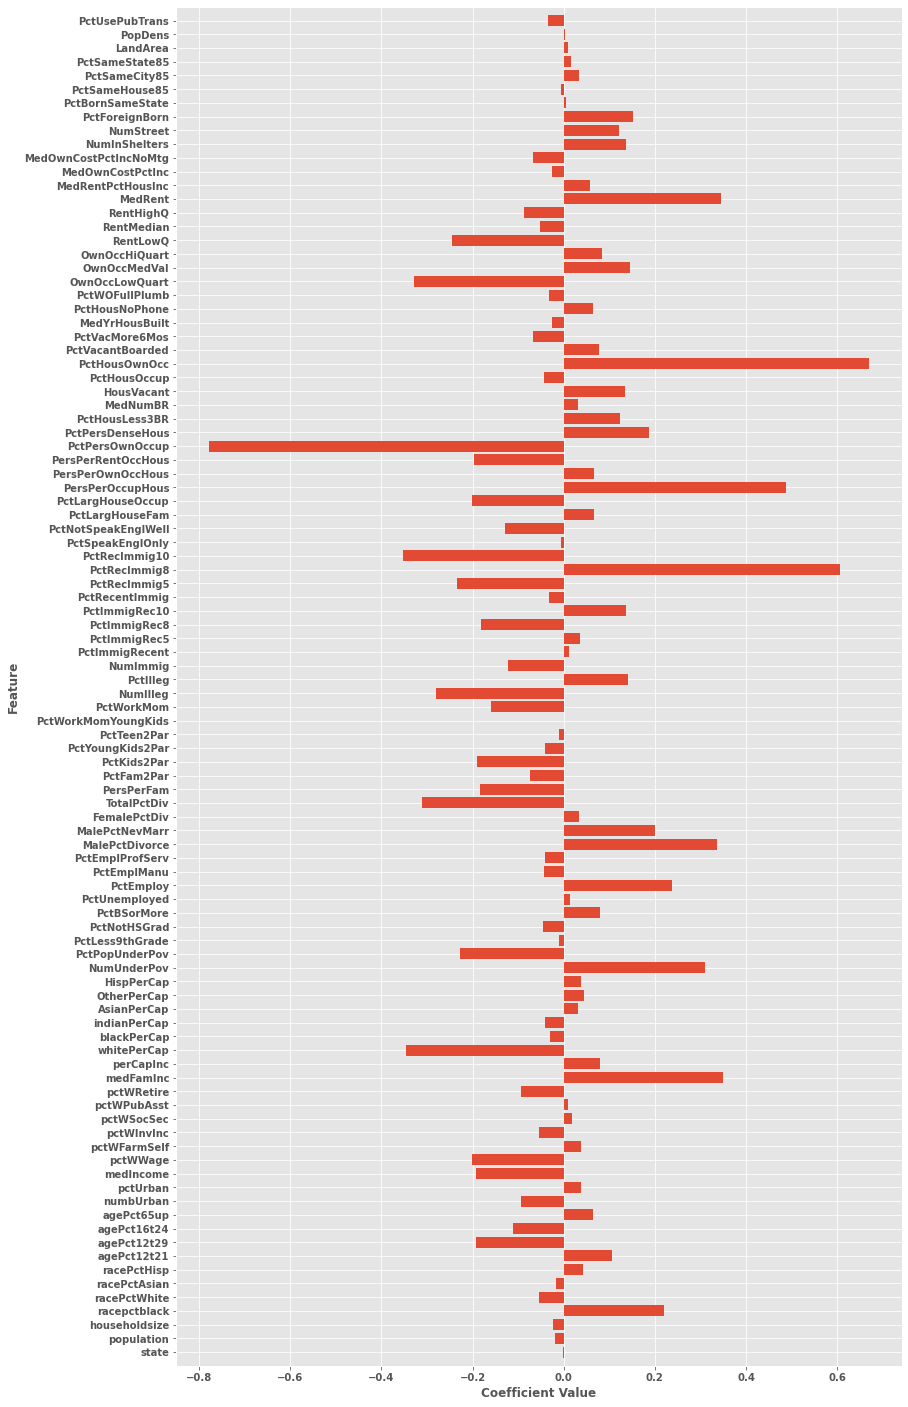

In [41]:
%matplotlib inline
# you give it a model, features, and the feature names
def plot_coefficients(model, n_features, feature_names):
    """Diaplays the regression coefficients of the different features in our data set"""
    plt.rcParams["figure.figsize"] = (13,25)
    pl.barh(range(n_features), model.coef_[:-1], align='center')# plot the barplot of the coeficients except 1 which is not meaningful to us.
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

plot_coefficients(linreg, len(feature_names), feature_names) # plots order the features
# the coefficients that we find might not be important because we didn't normalize the data, which we need to. 

### Finally, perform 10-fold cross-validation on the training partition and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection). Note if you cannot get the book's version working, use scikit-learn Linear Regression instead for a 3pt deduction).

In [42]:
# Now let's compute RMSE using 10-fold x-validation
n = 10


kf = KFold(n_splits=n)
kf.get_n_splits(vs_train_communities_with_ones)

#print(kf)  
#KFold(n_splits=n,random_state=None, shuffle=False)
 

xval_err = 0

# here are doing multiple train, test splits. 
for train, test in kf.split(vs_train_communities_with_ones):
    
    linreg.fit(vs_train_communities_with_ones[train],vs_target_train[train])    # build a linear regression model
    
    p = linreg.predict(vs_train_communities_with_ones[test])   # predict on the test set. 
    
    e = p-vs_target_train[test]                                 # look at the test error
    
    xval_err += np.sqrt(np.dot(e,e)/len(vs_train_communities_with_ones[test]))   # look at the cross validation error for each of the folds
       
rmse_10cv = xval_err/n            # then you get the average RMSE cross validation score by diving by 10

# we print the same way we did it earlier. 
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmseTrain)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1256
RMSE on 10-fold CV: 0.1339


##### There is a little bit of error in the RMSE on 10-fold Cross Validation which we expected and this implies that we have a better estimate of how well we are going to do because it does it several times.